<a href="https://colab.research.google.com/github/jpineda714/CIENCIA_DATOS_2025/blob/main/Clase_4_Medidas_de_tendencia_central_Variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
1. Definir cenceptos
2. Cargar datos desde drive
3. Calculo de la desviación estándar
4. Exploracion de distribucion de datos (graficos)


##1. Definicion de conceptos
1.1 Varianza
1..2 Desnviacion estandar
1.3 Desviacion de la media absoluta
1.4 Desnviacción absoluta mediana de la mediana (MAD)
1.5 Rango
1.6 Estadistica ordinal
1.7 Percentil
1.8 Rango intercualtil (IQR)


1.1 Varianza
Medida de dispersión que indica cuánto se alejan los valores de un conjunto respecto a la media.
- Referencia: Montgomery, D. C., & Runger, G. C. (2014). Applied Statistics and Probability for Engineers. Wiley.

1.2 Desviación estándar
Raíz cuadrada de la varianza; expresa la dispersión en las mismas unidades de los datos.
- Referencia: Walpole, R. E., Myers, R. H., Myers, S. L., & Ye, K. (2012). Probability and Statistics for Engineers and Scientists. Pearson.

1.3 Desviación media absoluta (DMA)
Promedio de las distancias absolutas entre cada dato y la media del conjunto.
- Referencia: Levine, D. M., Stephan, D., Krehbiel, T. C., & Berenson, M. L. (2017). Statistics for Managers Using Microsoft Excel. Pearson.

1.4 Mediana de las desviaciones absolutas (MAD)
Mediana de las distancias absolutas de cada dato respecto a la mediana; medida robusta de dispersión.
- Referencia: Rousseeuw, P. J., & Croux, C. (1993). Alternatives to the median absolute deviation. Journal of the American Statistical Association, 88(424), 1273-1283.

1.5 Rango
Diferencia entre el valor máximo y el mínimo de un conjunto de datos.
- Referencia: Triola, M. F. (2018). Elementary Statistics. Pearson.

1.6 Estadística ordinal
Rama de la estadística que trabaja con datos en escala ordinal, donde los valores representan un orden pero sin distancias numéricas precisas.
- Referencia: Pagano, R. R. (2012). Understanding Statistics in the Behavioral Sciences. Cengage.

1.7 Percentil
Valor que divide un conjunto de datos en 100 partes iguales; cada percentil indica la posición relativa de un dato.
- Referencia: Moore, D. S., McCabe, G. P., & Craig, B. A. (2017). Introduction to the Practice of Statistics. Macmillan.

1.8 Rango intercuartílico (IQR)
Diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1); mide la dispersión central del 50% de los datos.
- Referencia: Field, A. (2013). Discovering Statistics Using IBM SPSS Statistics. Sage.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
!pip install wquantiles

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy import trim_mean
import matplotlib.pyplot as plt
from statsmodels import robust
import wquantiles

In [5]:
data = pd.read_csv("/content/drive/MyDrive/state.csv")
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [12]:
Mayor_poblacion = data.groupby(["Population"])["State"].max()
Mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [15]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [16]:
#Calculando la desviacion estandar y los cuartiles
data["Population"].std()

6848235.347401142

In [17]:
#Extraer la desviacoin estandar de la tasa de asesinatos
data["Murder.Rate"].std()

1.915736124302923

In [18]:
#Calcular el IQR
data.Population.quantile(0.75) - data.Population.quantile(0.25)

np.float64(4847308.0)

In [30]:
#Calcular el IQR de la tasa de asesinatos
data["Murder.Rate"].quantile(0.75) - data["Murder.Rate"].quantile(0.25)

np.float64(3.125)

In [21]:
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [22]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

In [24]:
## HINT - Trabajo con dataframes
data1 = {"Nombre": ["Camilo","Kevin","Santiago",],
        "Edades": ["10","15","3"],
        "Juegos": ["Basketball","Tenis de mesa", "Futbol"]
}
df = pd.DataFrame(data1)
df

,Nombre,Edades,Juegos
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [25]:
#Renombrar headers
df = df.rename(columns={"Edades": "Años","Juegos":"Deportes"})
df

,Nombre,Años,Deportes
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [46]:
#Reemplazar headers de ingles a español
data_español = data.rename(columns={"State": "Estado", "Population":"Poblacion","Murder.Rate":"Tasa de asesinato","Abbreviation":"Abreviacion"})
data_español

,Estado,Poblacion,Tasa de asesinato,Abreviacion
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


##4. EXPLORACION EN LA DISTRIBUCION DE DATOS
4.1 Diagrama de caja (poner definicion e indicar como se lee)

4.2 Diagrama de frecuencias

4.3 Histograma

4.4 Diagrama de desnidad

4.1 Diagrama de caja (Boxplot)

Definición: Gráfico que resume la distribución de los datos usando mediana, cuartiles y posibles valores atípicos.

Cómo se lee: Se observa la línea central (mediana), los bordes de la caja (Q1 y Q3) que muestran el rango intercuartílico, y los "bigotes" que representan la dispersión. Los puntos fuera de los bigotes son outliers.

- Referencia: Tukey, J. W. (1977). Exploratory Data Analysis. Addison-Wesley.

4.2 Diagrama de frecuencias

Definición: Gráfico que muestra cuántas veces aparece cada valor o intervalo en un conjunto de datos.

Cómo se lee: En el eje horizontal están los valores (o intervalos), y en el eje vertical las frecuencias. Se identifican las categorías más frecuentes y la forma de la distribución.

- Referencia: Spiegel, M. R., Schiller, J., & Srinivasan, R. A. (2013). Probability and Statistics. McGraw-Hill.

4.3 Histograma

Definición: Gráfico de barras contiguas que representa la distribución de frecuencias de los datos en intervalos.

Cómo se lee: La altura de cada barra muestra la frecuencia (absoluta o relativa) de los datos en ese rango. La forma del histograma permite identificar sesgo, simetría o concentración de los datos.

- Referencia: Triola, M. F. (2018). Elementary Statistics. Pearson.

4.4 Diagrama de densidad

Definición: Curva suavizada que estima la distribución de probabilidad de los datos continuos.

Cómo se lee: El eje horizontal muestra los valores posibles y el eje vertical la densidad. El área bajo la curva es 1 (100%), y se interpreta como la probabilidad de encontrar valores en ciertos rangos.

- Referencia: Silverman, B. W. (1986). Density Estimation for Statistics and Data Analysis. Chapman & Hall.

In [27]:
###4.1 Diagrama de caja
data["Murder.Rate"].quantile([0.05,0.25,0.5,0.75,0.95])

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


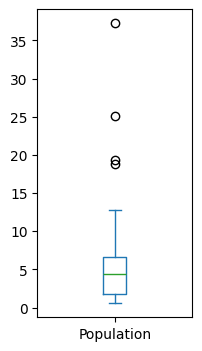

In [50]:
#Grafica de diagrama de caja
ax = (data.Population/1_000_000).plot.box(figsize = (2,4))
ax.set_label("Poblacion en millones")
#Ofrecer una explicacion de lo que estoy haciendo y repetirlo con Murder.Rate

# Se observa la línea central (mediana), los bordes de la caja (Q1 y Q3) que
#muestran el rango intercuartílico, y los "bigotes" que representan la dispersión.
#Los puntos fuera de los bigotes son outliers.

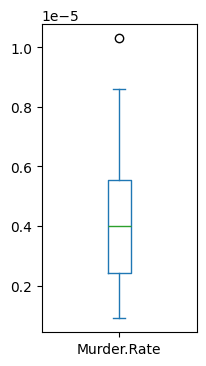

In [51]:
ax = (data["Murder.Rate"]/1_000_000).plot.box(figsize = (2,4))
ax.set_label("Poblacion en millones")

In [38]:
#Calculo de la tabla de frecuencia e histograma
binnedPopulation = pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


In [53]:
binnedMurder_Rate = pd.cut(data["Murder.Rate"],10)
binnedMurder_Rate.value_counts()

,count
Murder.Rate,
"(1.84, 2.78]",10
"(4.66, 5.6]",9
"(5.6, 6.54]",8
"(2.78, 3.72]",8
"(3.72, 4.66]",7
"(0.891, 1.84]",5
"(6.54, 7.48]",1
"(8.42, 9.36]",1
"(9.36, 10.3]",1


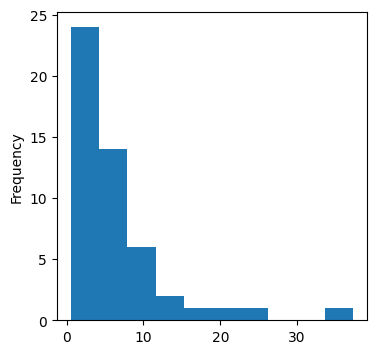

In [70]:
ax = (data.Population/1_000_000).plot.hist(figsize = (4,4))
ax.set_label("Poblacion en millones")

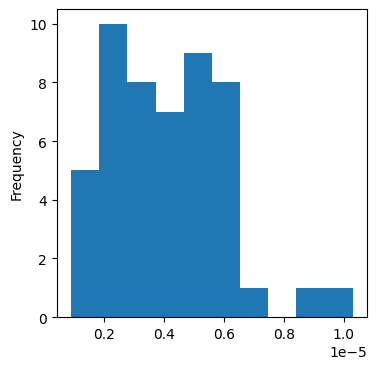

In [71]:
ax = (data["Murder.Rate"]/1_000_000).plot.hist(figsize = (4,4))
ax.set_label("Poblacion en millones")

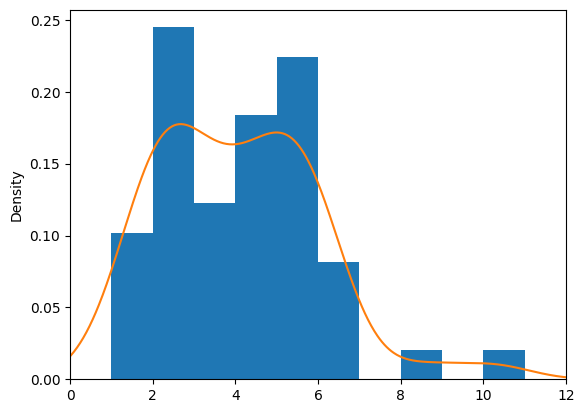

In [72]:
#diagrama de dispersion y curva de densidad
ax = data["Murder.Rate"].plot.hist(density = True, xlim = [0,12], bins = range (1,12))
data["Murder.Rate"].plot.density(ax = ax)
ax.set_label("Tasa de asesinatos por 1M de habitantes")

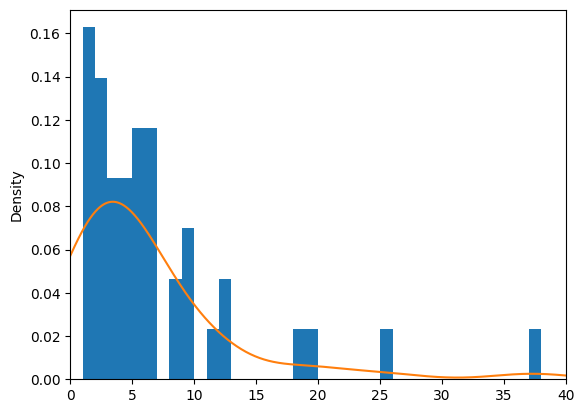

In [80]:
ax = (data.Population/1_000_000).plot.hist(density = True, xlim = [0,40], bins = range (1,40))
(data.Population/1_000_000).plot.density(ax = ax)
ax.set_label("Tasa de asesinatos por 1M de habitantes")